# Shapley Approximation (shap)

https://github.com/shap/shap

In [85]:
#Training and Testing Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
import shap
import xgboost as xgb

In [87]:
params = {
    "tree_method": "gpu_hist",
    "n_estimators": 2000,
}

In [88]:
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [89]:
# Explain predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Visualizations - Shapley Approximation (shap) 

In [90]:
# Calculate feature importance
ft_importance = pd.DataFrame({"Feature Importance": np.abs(shap_values).mean(0)}, index=X_train.columns)
X_cols = ft_importance.query('`Feature Importance` > 0').sort_values(by="Feature Importance", ascending=False)

# Display
X_cols.style.background_gradient(cmap='viridis', vmin=.001, vmax=.6).format({"Feature Importance": "{:.3f}"})


,Feature Importance
Filtered_FC3,0.626
Filtered_Fz,0.590
Filtered_F7,0.556
Filtered_FT7,0.535
Filtered_T4,0.510
Filtered_T3,0.474
Filtered_Fp1,0.470
Filtered_Fp2,0.468
Filtered_TP7,0.447
Filtered_F8,0.427


### SHAP Summary Plot

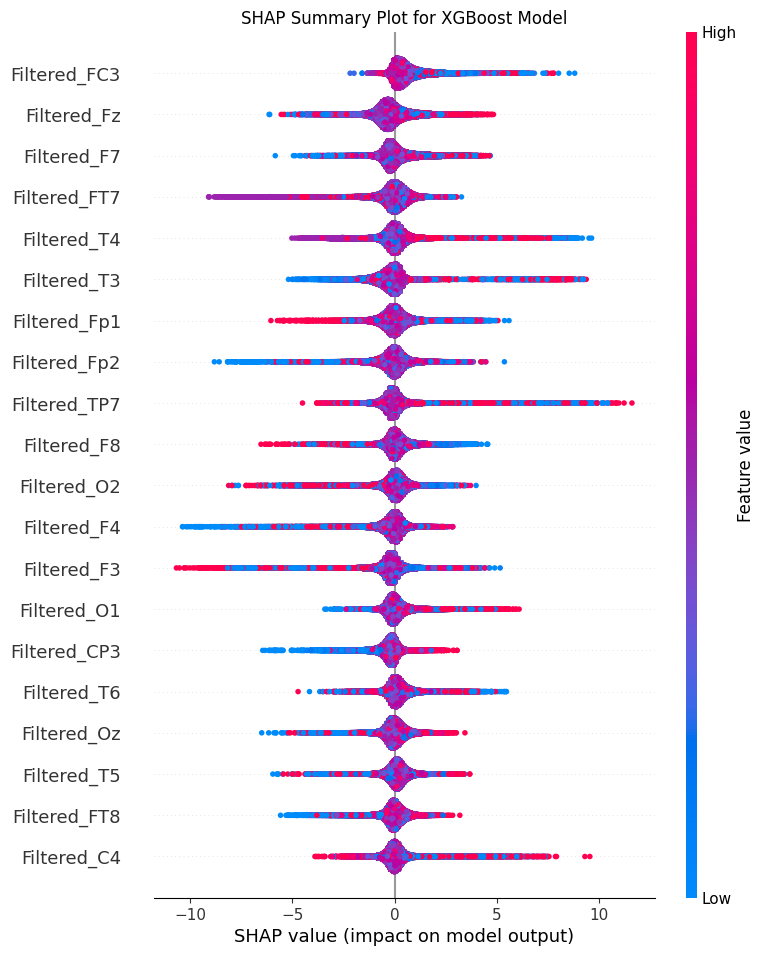

In [91]:
# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot for XGBoost Model")
plt.show()

### SHAP Bar plot

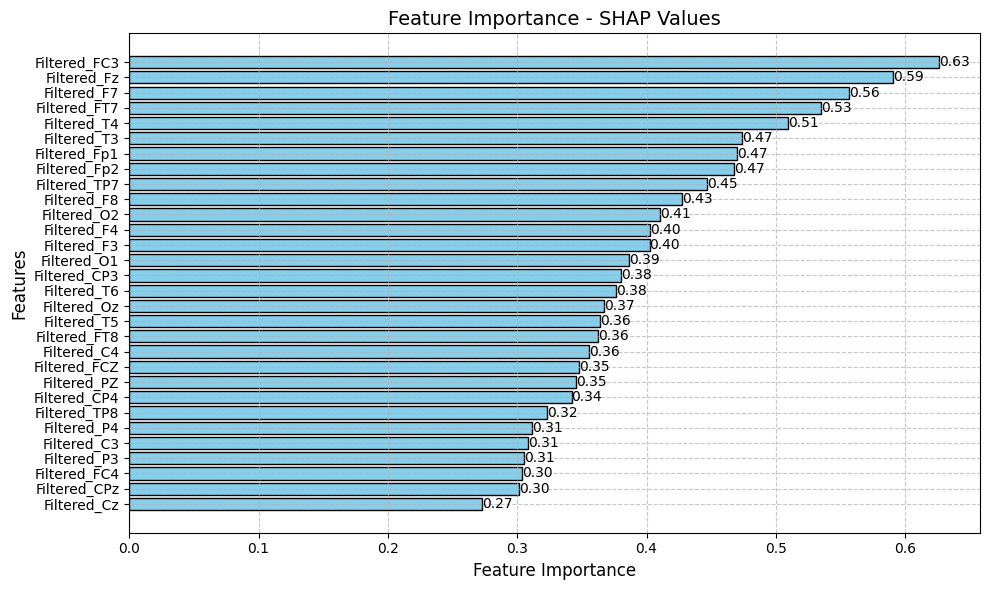

In [92]:
fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.barh(X_cols.index, X_cols['Feature Importance'], color='skyblue', edgecolor='black')
ax.grid(axis='both', linestyle='--', alpha=0.7)
ax.set_xlabel('Feature Importance', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Feature Importance - SHAP Values', fontsize=14)
ax.invert_yaxis()


for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            '{:.2f}'.format(bar.get_width()), 
            va='center', ha='left', fontsize=10)


plt.tight_layout()
plt.show()

### SHAP Scatter plot

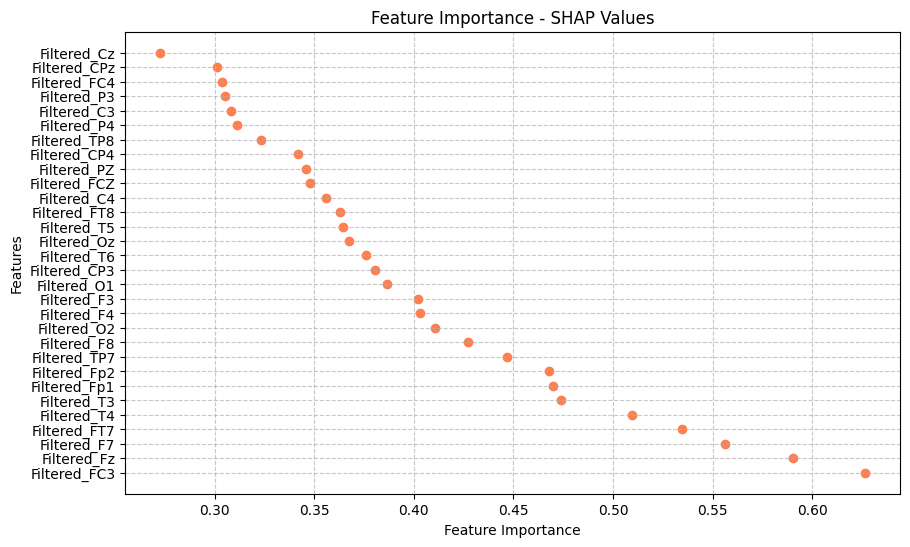

In [93]:
# Scatter plot of feature importance
plt.figure(figsize=(10, 6))
plt.scatter(X_cols['Feature Importance'], X_cols.index, color='coral')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - SHAP Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### SHAP Pie Chart

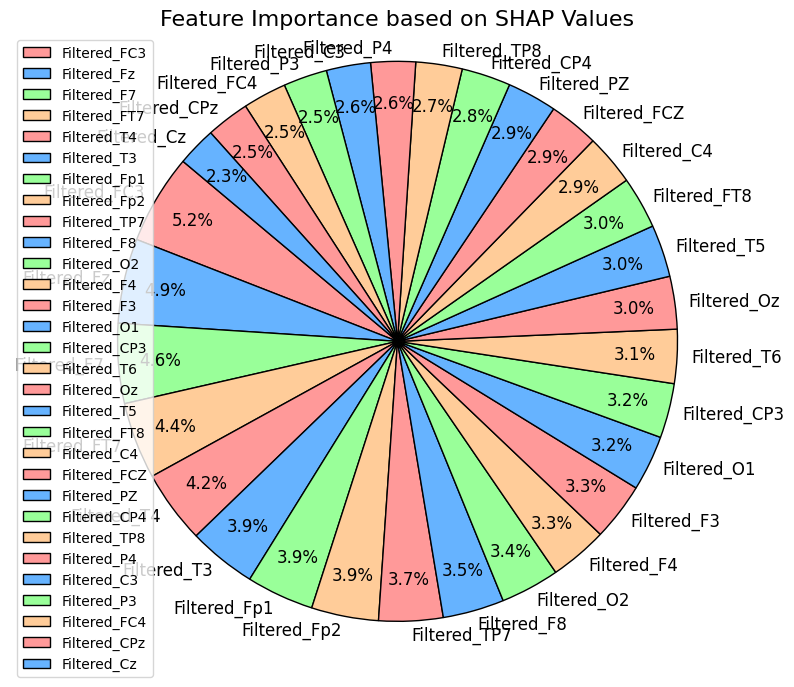

In [94]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(10, 8))


plt.pie(X_cols['Feature Importance'], 
        labels=X_cols.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,      
        wedgeprops={'edgecolor': 'black'},  
        textprops={'fontsize': 12},  
        pctdistance=0.85,     
        labeldistance=1.05)   


plt.legend(X_cols.index, loc="best")
plt.title('Feature Importance based on SHAP Values', fontsize=16)
plt.axis('equal')
plt.show()

# Feature Selection using SHAP Values - Top 3 Features

In [95]:
# Calculate feature importance using mean absolute SHAP values
ft_importance = pd.DataFrame({"Feature Importance": np.abs(shap_values).mean(0)}, index=X_train.columns)
top_3_features = ft_importance.sort_values(by="Feature Importance", ascending=False).index[:20]

# Use selected features for further analysis or prediction
reduced_X_train = X_train[top_3_features]
reduced_X_test = X_test[top_3_features]

In [96]:
reduced_X_train

,Filtered_FC3,Filtered_Fz,Filtered_F7,Filtered_FT7,Filtered_T4,Filtered_T3,Filtered_Fp1,Filtered_Fp2,Filtered_TP7,Filtered_F8,Filtered_O2,Filtered_F4,Filtered_F3,Filtered_O1,Filtered_CP3,Filtered_T6,Filtered_Oz,Filtered_T5,Filtered_FT8,Filtered_C4
120597,1.250400,0.802271,0.284293,0.298772,-1.523685,-0.189158,-1.311809,-0.435642,1.313840,-0.562569,-0.509842,0.191244,0.659398,1.649281,1.731113,1.063424,1.414716,1.278257,-0.627989,0.948224
485239,-4.381936,-4.761847,-3.112032,-3.191524,0.417413,-3.077256,-5.401998,-1.264103,-4.251164,-0.984630,-2.742757,-4.313560,-4.361818,-3.663874,-4.095086,-0.580847,-3.748966,-2.852713,-1.822751,-2.367358
760929,-0.431011,-0.818431,-0.324476,-0.697755,-1.314569,-0.976113,-0.017141,-1.588167,-1.540609,-2.298816,-1.573735,-1.698987,-0.286963,-0.240932,-0.403488,-1.437900,-0.547873,-0.543804,-2.037265,-1.348458
325213,-1.851616,-1.398640,-1.997293,-1.491027,-0.584521,-1.482109,-3.459780,-2.828681,-1.010214,-3.590456,-0.260360,-1.062789,-1.721054,-0.629452,-0.718916,-2.669026,-0.036218,-0.826500,-3.268307,-1.567752
132923,-0.829879,-1.362310,-0.356313,0.203659,-1.785916,-2.208504,-0.928789,-2.451168,-0.137132,-1.853356,-0.428657,-2.849062,-0.523323,-0.059666,-0.045881,-0.285277,-0.271297,-0.359022,-1.891881,-0.441534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565842,-0.807525,-0.661331,-1.362880,-1.616138,1.395583,-1.744108,-0.183066,0.817066,-1.625559,-0.421885,1.194134,-2.312971,-1.076551,0.160515,-0.523057,1.055241,0.790416,-1.197989,0.367849,0.172691
629510,-0.075148,-2.237429,-2.463971,-2.542809,2.737773,-0.508537,-1.393917,0.627867,-0.225248,4.359459,3.061310,0.602899,-3.469579,2.287475,-0.032558,2.340260,1.830202,0.128100,3.571602,0.972891
414260,0.585113,1.433846,2.645678,2.463623,-1.288302,2.275777,2.484720,2.374287,0.627735,0.575758,-1.919230,0.978833,0.888150,-2.042308,-0.414916,-2.573071,-1.343394,-1.233070,0.329788,0.383744
696415,-8.081566,-7.667758,-7.685896,-6.205633,-3.929758,-5.993860,-5.659355,-3.817136,-6.117138,-2.073421,-5.536941,-5.086846,-8.087959,-5.676409,-5.312050,-4.094658,-6.111484,-5.917039,-3.687588,-4.689938


In [97]:
reduced_X_test

,Filtered_FC3,Filtered_Fz,Filtered_F7,Filtered_FT7,Filtered_T4,Filtered_T3,Filtered_Fp1,Filtered_Fp2,Filtered_TP7,Filtered_F8,Filtered_O2,Filtered_F4,Filtered_F3,Filtered_O1,Filtered_CP3,Filtered_T6,Filtered_Oz,Filtered_T5,Filtered_FT8,Filtered_C4
139433,0.463494,0.363588,3.374285,2.210703,-0.533359,1.197296,0.513508,0.277976,0.733315,-0.548189,0.266760,0.090452,1.210963,0.935055,0.313672,0.070307,0.472213,0.540665,-0.436822,0.191753
527024,-3.129023,-2.410968,-4.834205,-4.384177,1.457597,-3.491868,-2.521175,-1.380134,-1.724126,1.781372,-0.278064,-0.653560,-3.193431,-0.068689,-2.085794,1.320980,-0.487461,-0.430988,1.791385,-0.012021
640745,1.563387,1.492500,1.918776,1.818171,1.627613,1.099559,0.670262,0.765207,-0.403448,1.771539,-0.584597,3.459478,2.843328,-1.636694,1.476275,0.260791,-0.508303,-0.303806,2.836559,1.165746
361557,1.046744,0.929621,0.152054,1.051322,0.337579,0.285756,-0.560886,0.967229,1.454861,-0.076995,2.100475,1.830779,0.399184,0.820583,0.954376,-0.207802,1.290391,0.874572,0.220162,1.258962
163987,1.120106,0.828464,2.198337,2.718085,1.288396,2.046541,2.460450,2.650798,0.468346,4.161395,1.232476,1.915530,1.565025,-0.331543,0.256622,-0.998657,0.039910,0.266949,2.436684,1.343995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238967,-2.076848,-1.499119,-1.258657,-1.292927,-1.513524,-1.575639,-2.189283,-3.348047,-1.158402,-1.220450,-3.135560,-2.028392,-1.698392,-3.307552,-2.097844,-1.496623,-2.269487,-1.490150,-1.034371,-1.635624
467044,-2.222495,-3.795118,-0.773427,-0.048996,0.326908,0.295329,-0.351231,-0.618056,-0.124344,-1.231672,0.319406,-2.834516,-2.036807,0.175152,-0.724083,-0.521152,0.318523,0.241367,-1.517409,-2.950933
139715,0.695921,0.848390,-0.602721,-0.045778,-0.311315,0.584344,0.116070,0.670283,0.510552,0.063329,0.429158,0.649566,0.541223,0.835256,1.362674,-0.367551,0.379783,0.765634,0.087791,0.901079
523374,2.171070,2.960164,3.466109,2.540445,0.997922,2.433002,1.856765,1.060992,1.600716,0.525088,2.326311,2.234942,2.810952,0.389025,2.054613,-0.408749,0.382888,1.435034,0.631067,-0.353568
